# Fuzzy Min-Max Neural Network with Original Online Learning Algorithm

This example shows how to use Simpson's fuzzy min-max neural network with the original online learning algorithm (FMNN)

Note that the numerical features in training and testing datasets must be in the range of [0, 1] because the FMNN classifiers require features in the unit cube.

## 1. Execute directly from the python file

In [1]:
%matplotlib notebook

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

#### Get the path to the this jupyter notebook file

In [3]:
this_notebook_dir = os.path.dirname(os.path.abspath("__file__"))
this_notebook_dir

'C:\\hyperbox-brain\\examples\\numerical_data\\incremental_learner'

#### Get the home folder of the Hyperbox-Brain project

In [4]:
from pathlib import Path
project_dir = Path(this_notebook_dir).parent.parent.parent
project_dir

WindowsPath('C:/hyperbox-brain')

#### Create the path to the Python file containing the implementation of the FMNN classifier using the original online learning algorithm

In [5]:
fmnn_file_path = os.path.join(project_dir, Path("hbbrain/numerical_data/incremental_learner/fmnn.py"))
fmnn_file_path

'C:\\hyperbox-brain\\hbbrain\\numerical_data\\incremental_learner\\fmnn.py'

#### Run the found file by showing the execution directions

In [6]:
!python "{fmnn_file_path}" -h

usage: fmnn.py [-h] -training_file TRAINING_FILE -testing_file TESTING_FILE
               [--theta THETA] [--gamma GAMMA] [--is_draw IS_DRAW]

The description of parameters

required arguments:
  -training_file TRAINING_FILE
                        A required argument for the path to training data file
                        (including file name)
  -testing_file TESTING_FILE
                        A required argument for the path to testing data file
                        (including file name)

optional arguments:
  --theta THETA         Maximum hyperbox size (in the range of (0, 1])
                        (default: 0.5)
  --gamma GAMMA         A sensitivity parameter describing the speed of
                        decreasing of the membership function in each
                        dimension (larger than 0) (default: 1)
  --is_draw IS_DRAW     Show the existing hyperboxes during the training
                        process on the screen (default: False)


#### Create the path to training and testing datasets stored in the dataset folder

In [7]:
training_data_file = os.path.join(project_dir, Path("dataset/syn_num_train.csv"))
training_data_file

'C:\\hyperbox-brain\\dataset\\syn_num_train.csv'

In [8]:
testing_data_file = os.path.join(project_dir, Path("dataset/syn_num_test.csv"))
testing_data_file

'C:\\hyperbox-brain\\dataset\\syn_num_test.csv'

#### Run a demo program

In [9]:
!python "{fmnn_file_path}" -training_file "{training_data_file}" -testing_file "{testing_data_file}" --theta 0.1 --gamma 1

Number of hyperboxes = 91
Testing accuracy =  85.30%


## 2. Using the Simpson's FMNN classifier through init, fit, and predict functions

In [10]:
from hbbrain.numerical_data.incremental_learner.fmnn import FMNNClassifier
import pandas as pd

#### Create training and testing data sets

In [11]:
df_train = pd.read_csv(training_data_file, header=None)
df_test = pd.read_csv(testing_data_file, header=None)

Xy_train = df_train.to_numpy()
Xy_test = df_test.to_numpy()

Xtr = Xy_train[:, :-1]
ytr = Xy_train[:, -1]

Xtest = Xy_test[:, :-1]
ytest = Xy_test[:, -1]

#### Initializing parameters

In [12]:
theta = 0.1
gamma = 1
is_draw = True

#### Training

<IPython.core.display.Javascript object>


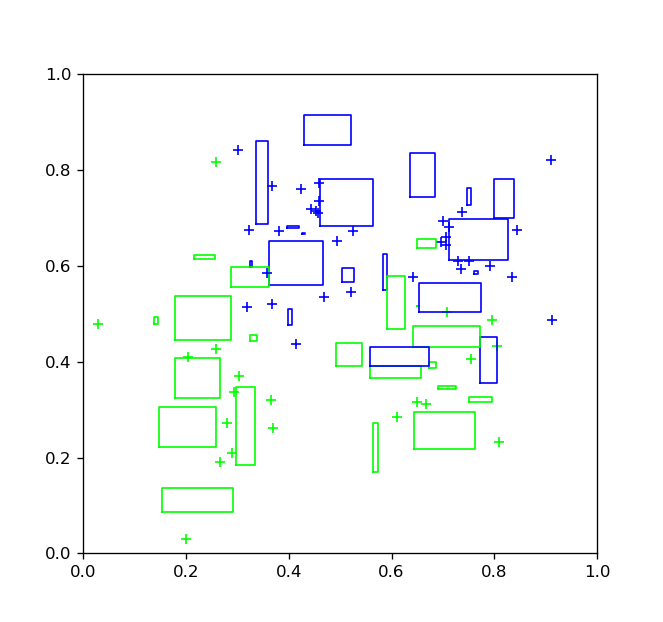

FMNNClassifier(C=array([1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1]),
               V=array([[0.36239   , 0.55942   ],
       [0.64082   , 0.43016875],
       [0.91059   , 0.82085   ],
       [0.65328   , 0.50326   ],
       [0.46107   , 0.68306   ],
       [0.29812   , 0.18424   ],
       [0.33593   , 0.68775   ],
       [0.1...
       [0.25621   , 0.62174   ],
       [0.42403   , 0.7592    ],
       [0.79157   , 0.59996   ],
       [0.72496   , 0.34978   ],
       [0.36842   , 0.76576   ],
       [0.73681   , 0.71261   ],
       [0.66773   , 0.31155   ],
       [0.32289   , 0.6747    ],
       [0.28077   , 0.27116   ],
       [0.61106   , 0.28476   ],
       [0.75421   , 0.40498   ],
       [0.38038   , 0.67232   ],
       [0.3674

In [13]:
fmnn_clf = FMNNClassifier(theta=theta, gamma=gamma, is_draw=is_draw)
fmnn_clf.fit(Xtr, ytr)

#### The code below shows how to display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


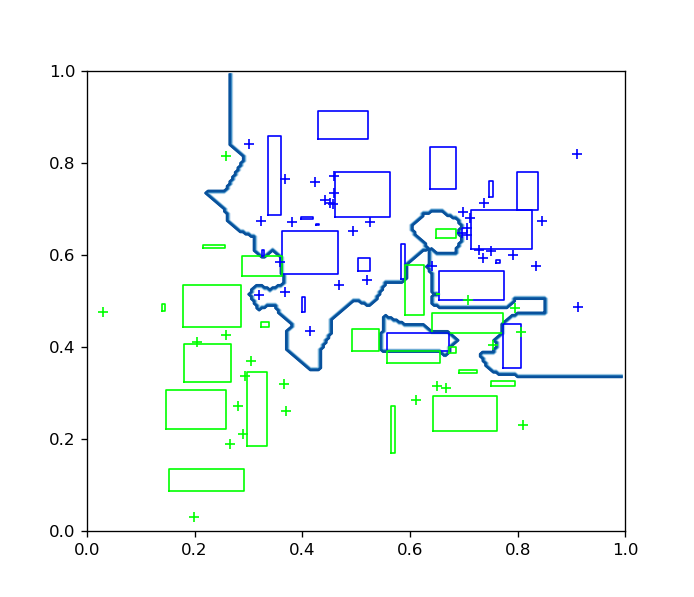

In [14]:
fmnn_clf.draw_hyperbox_and_boundary("The trained Simpson's FMNN classifier and its decision boundaries")

In [15]:
print("Number of existing hyperboxes = %d"%(fmnn_clf.get_n_hyperboxes()))

Number of existing hyperboxes = 91


#### Predicting

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
y_pred = fmnn_clf.predict(Xtest)
acc = accuracy_score(ytest, y_pred)
print(f'Accuracy = {acc * 100: .2f}%')

Accuracy =  85.30%


#### Explaining the predicted result for the input sample by showing membership values and hyperboxes for each class

In [18]:
sample_need_explain = 10
y_pred_input_0, mem_val_classes, min_points_classes, max_points_classes = fmnn_clf.get_sample_explanation(Xtest[sample_need_explain])

In [19]:
print("Predicted class for sample X = [%f, %f] is %d and real class is %d" % (Xtest[sample_need_explain, 0], Xtest[sample_need_explain, 1], y_pred_input_0, ytest[sample_need_explain]))

Predicted class for sample X = [0.571640, 0.233700] is 2 and real class is 2


In [20]:
print("Membership values:")
for key, val in mem_val_classes.items():
    print("Class %d has the maximum membership value = %f" % (key, val))
    
for key in min_points_classes:
    print("Class %d has the representative hyperbox: V = %s and W = %s" % (key, min_points_classes[key], max_points_classes[key]))

Membership values:
Class 1 has the maximum membership value = 0.960506
Class 2 has the maximum membership value = 1.000000
Class 1 has the representative hyperbox: V = [0.55763   0.3916775] and W = [0.67326    0.43015875]
Class 2 has the representative hyperbox: V = [0.56487 0.17003] and W = [0.57285 0.27229]


### Show input sample and hyperboxes belonging to each class. In 2D, we can show rectangles or use parallel coordinates

#### Using rectangles to show explanations

<IPython.core.display.Javascript object>


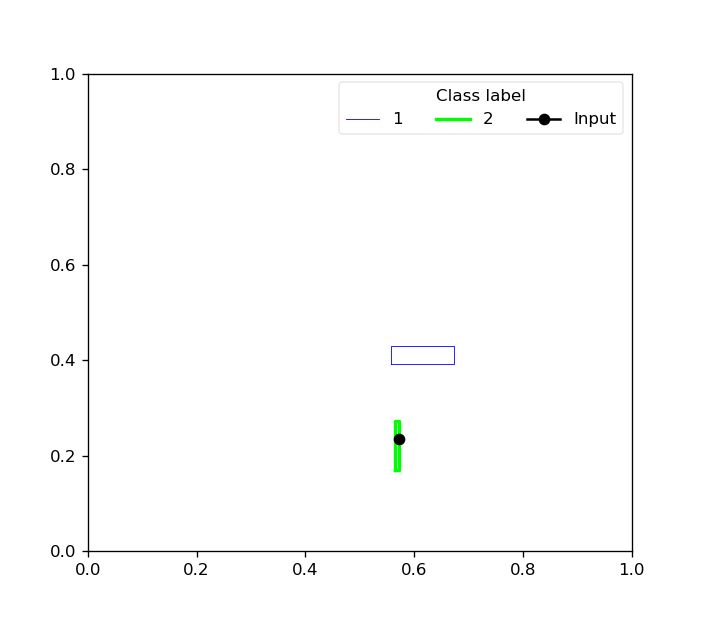

In [21]:
fmnn_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0, "2D")

#### Using parallel coordinates. This mode best fits for any dimensions

In [ ]:
fmnn_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0)